## Task 1

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt


# Load Donald Trump's tweets
with open('/workspaces/AppDSTask2/donald-200-tweets.txt') as file:
    trump_tweets = json.load(file)

# Load Kamala Harris' tweets
with open('/workspaces/AppDSTask2/kamala-200-tweets.txt') as file:
    kamala_tweets = json.load(file)

# Extract the important features: text, created_at, and public_metrics
def extract_important_features(tweets, author):
    return [
        {
            'author': author,
            'text': tweet['text'],
            'created_at': tweet['created_at'],
            'public_metrics': tweet['public_metrics'],
            'attachments': tweet.get('attachments', {}),
            'entities': tweet.get('entities', {})
             

             


            
        }
        for tweet in tweets
    ]

# Extract data for each author
trump_data = extract_important_features(trump_tweets, 'Donald Trump')
kamala_data = extract_important_features(kamala_tweets, 'Kamala Harris')

# Combine both datasets into a single DataFrame
df = pd.DataFrame(trump_data + kamala_data)

# Display the DataFrame
print(df.head())


         author                                               text  \
0  Donald Trump  THANK YOU, NORTH CAROLINA! #MAGA2024 https://t...   
1  Donald Trump  Hello everyone! I have something incredible to...   
2  Donald Trump  RT @MELANIATRUMP: https://t.co/ZCTwZSqZND http...   
3  Donald Trump  RT @MELANIATRUMP: https://t.co/ZCTwZSqZND http...   
4  Donald Trump              RT @elonmusk: https://t.co/fVv6TF7Gdh   

                 created_at  \
0  2024-09-22T01:51:04.000Z   
1  2024-09-21T17:48:52.000Z   
2  2024-09-20T13:28:17.000Z   
3  2024-09-20T13:28:11.000Z   
4  2024-09-20T05:58:06.000Z   

                                      public_metrics  \
0  {'bookmark_count': 1937, 'impression_count': 9...   
1  {'bookmark_count': 8219, 'impression_count': 2...   
2  {'bookmark_count': 0, 'impression_count': 20, ...   
3  {'bookmark_count': 0, 'impression_count': 22, ...   
4  {'bookmark_count': 0, 'impression_count': 71, ...   

                                         attachments  \

In [2]:
df['public_metrics'][1]

{'bookmark_count': 8219,
 'impression_count': 25037966,
 'like_count': 137184,
 'quote_count': 4819,
 'reply_count': 23985,
 'retweet_count': 21319}

## Task 2

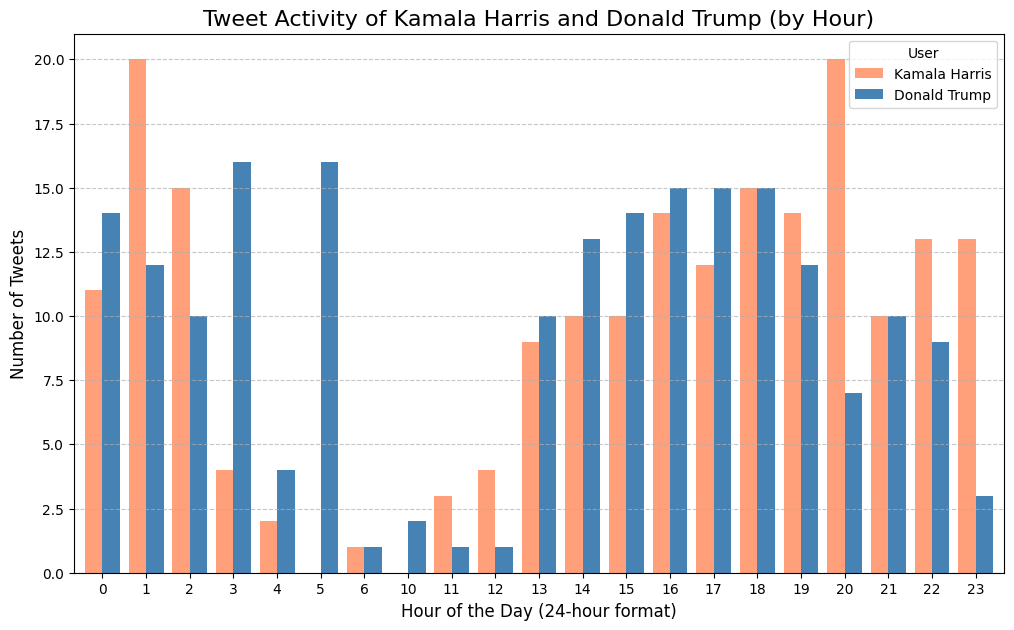

In [3]:

# Assuming `df` is the DataFrame with tweets and the 'created_at' field

# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Extract the hour from 'created_at'
df['hour'] = df['created_at'].dt.hour

# Separate the data for each user
kamala_df = df[df['author'] == 'Kamala Harris']
trump_df = df[df['author'] == 'Donald Trump']

# Group by hour and count the number of tweets for each user
kamala_hours = kamala_df.groupby('hour').size()
trump_hours = trump_df.groupby('hour').size()

# Create a DataFrame for both users' tweet counts by hour
hourly_tweets = pd.DataFrame({
    'Kamala Harris': kamala_hours,
    'Donald Trump': trump_hours
}).fillna(0)

# Plotting the bar chart with custom colors and settings
ax = hourly_tweets.plot(kind='bar', figsize=(12, 7), width=0.8, color=['#FFA07A', '#4682B4'])

# Customizing the plot
plt.title('Tweet Activity of Kamala Harris and Donald Trump (by Hour)', fontsize=16)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='User', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Task 3

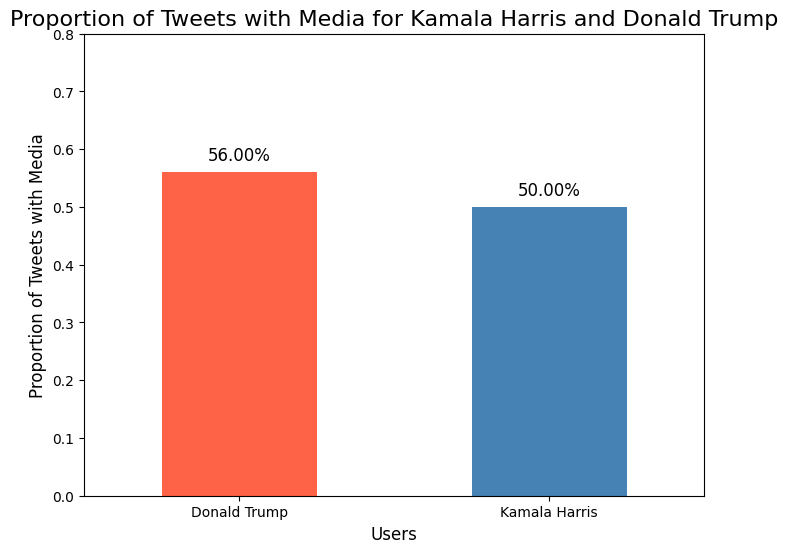

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is the DataFrame with tweets and the 'attachments' field

# Check if media_keys exist in the 'attachments' field
df['has_media'] = df['attachments'].apply(lambda x: 'media_keys' in x if isinstance(x, dict) else False)

# Calculate the proportion of tweets with media keys for each user
media_proportions = df.groupby('author')['has_media'].mean()

# Plotting the bar chart
ax = media_proportions.plot(kind='bar', figsize=(8, 6), color=['#FF6347', '#4682B4'], width=0.5)

# Add annotations (percentages) on top of the bars
for i, v in enumerate(media_proportions):
    ax.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', fontsize=12)

# Customize the plot
plt.title('Proportion of Tweets with Media for Kamala Harris and Donald Trump', fontsize=16)
plt.xlabel('Users', fontsize=12)
plt.ylabel('Proportion of Tweets with Media', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 0.8)


# Show the plot
plt.show()


In [5]:
import re
df['hashtag'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))

## Task 4
### Both methods will give you the count of hashtags, but they have some differences:

### Using entities:

### This method relies on the structured data provided in the tweets.
### It’s more reliable because it directly accesses the parsed hashtags from the tweet data, ensuring that you capture all hashtags consistently.
### Using re.findall:

### This method extracts hashtags from the tweet text using a regular expression.
### It’s also effective, but it might miss some hashtags if the text format varies or if there are unusual characters.
### Recommendation:
### 
Using the entities field is generally the better approach, as it provides a more structured and reliable method for counting hashtags. However, you can use both methods for verification or if you need different perspectives.


/tmp/ipykernel_49095/657880890.py:24: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


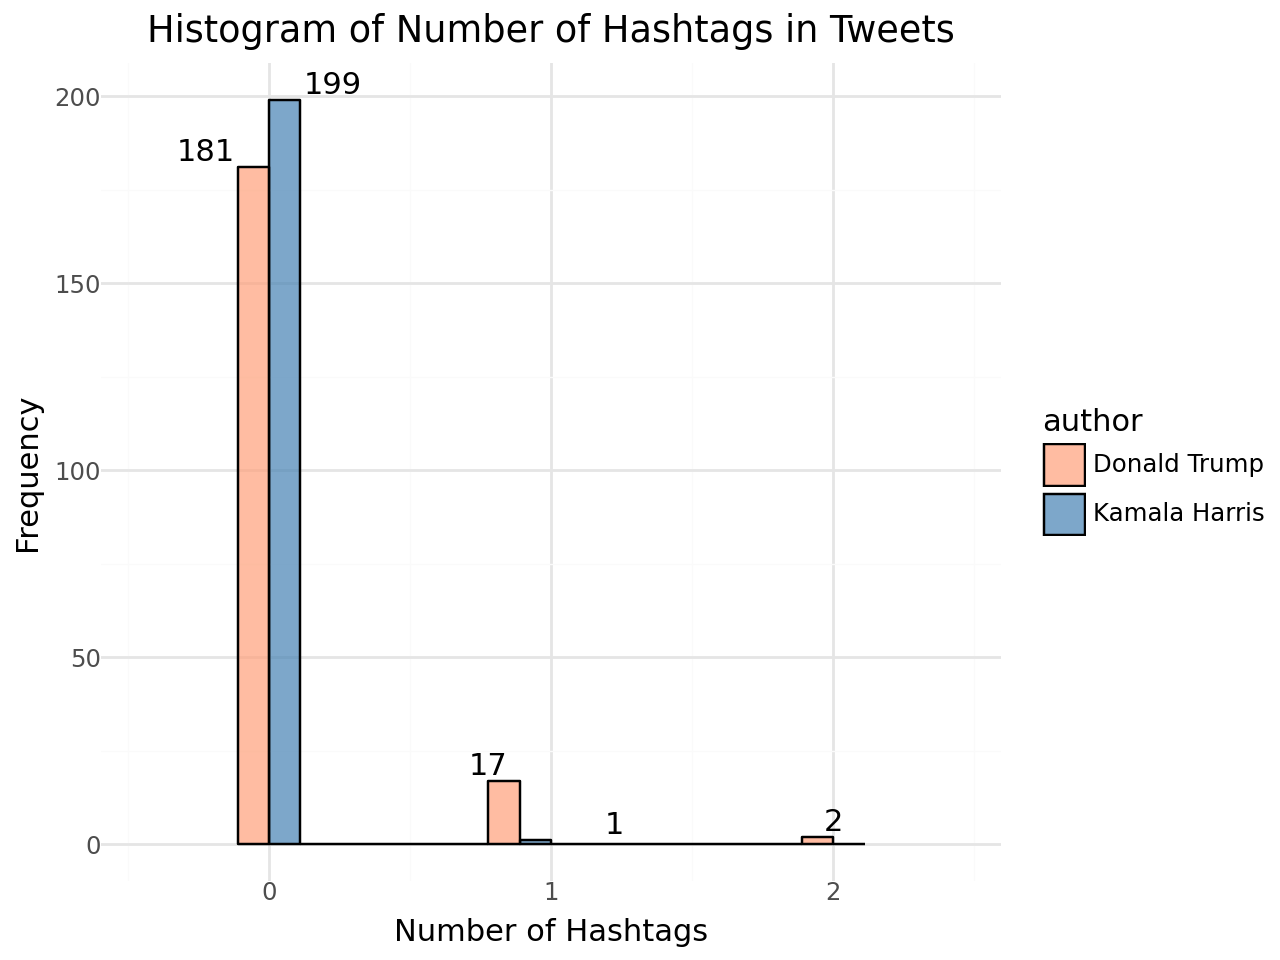

In [6]:
import pandas as pd
import re
import plotnine
from plotnine import *

# Assuming `df` is the DataFrame with tweets and the 'text' field

# Extract hashtags using regex and count them
df['num_hashtags'] = df['text'].apply(lambda x: len(re.findall(r'#(\w+)', x)))

# Create a histogram using plotnine
histogram = (
    ggplot(df, aes(x='num_hashtags', fill='author')) +
    geom_histogram(bins=10, position='dodge', alpha=0.7, color='black') +
    labs(title='Histogram of Number of Hashtags in Tweets',
         x='Number of Hashtags',
         y='Frequency') +
    theme_minimal() +
    scale_fill_manual(values=['#FFA07A', '#4682B4']) +
    geom_text(aes(label='..count..'), stat='count', position=position_dodge(width=0.9), va='bottom')
)

# Show the plot
print(histogram)


In [7]:
import pandas as pd
import re
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('word_tokenize')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Assuming df is your DataFrame with tweets

# Step 1: Prepare stopwords

stop_words = set(stopwords.words('english'))

# Step 2: Tokenize the tweets and remove stopwords
def tokenize_and_filter(text):
    words = word_tokenize(text.lower())
    return [word for word in words if word.isalpha() and word not in stop_words]

df['tokens'] = df['text'].apply(tokenize_and_filter)

# Step 3: Create a DataFrame with words and their counts for each user
kamala_words = df[df['author'] == 'Kamala Harris']['tokens'].explode()
trump_words = df[df['author'] == 'Donald Trump']['tokens'].explode()

kamala_counts = kamala_words.value_counts().reset_index()
trump_counts = trump_words.value_counts().reset_index()

kamala_counts.columns = ['word', 'kamala_count']
trump_counts.columns = ['word', 'trump_count']

# Step 4: Merge counts and calculate log odds ratio
word_counts = pd.merge(kamala_counts, trump_counts, on='word', how='outer').fillna(0)
word_counts['kamala_count'] = word_counts['kamala_count'].astype(int)
word_counts['trump_count'] = word_counts['trump_count'].astype(int)

# Step 5: Calculate the log odds ratio
word_counts['total_kamala'] = word_counts['kamala_count'].sum()
word_counts['total_trump'] = word_counts['trump_count'].sum()

word_counts['log_odds'] = np.log((word_counts['kamala_count'] + 1) / (word_counts['total_kamala'] - word_counts['kamala_count'] + 1) /
                                  (word_counts['trump_count'] + 1) / (word_counts['total_trump'] - word_counts['trump_count'] + 1))

# Step 6: Get the top 20 words for each user
top_kamala = word_counts.nlargest(20, 'log_odds')[['word', 'log_odds']]
top_trump = word_counts.nsmallest(20, 'log_odds')[['word', 'log_odds']]

print("Top 20 Words Associated with Kamala Harris:")
print(top_kamala)

print("\nTop 20 Words Associated with Donald Trump:")
print(top_trump)


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading word_tokenize: Package 'word_tokenize' not
[nltk_data]     found in index


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/codespace/nltk_data'
    - '/usr/local/python/3.12.1/nltk_data'
    - '/usr/local/python/3.12.1/share/nltk_data'
    - '/usr/local/python/3.12.1/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [8]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "This is a sample sentence."
tokens = word_tokenize(text)
print(tokens)



[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/home/codespace/nltk_data'
    - '/usr/local/python/3.12.1/nltk_data'
    - '/usr/local/python/3.12.1/share/nltk_data'
    - '/usr/local/python/3.12.1/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
